# **Hyper parameter tuning and investigating the effects of optimizer**

This notebook involves hyperparameter tuning to identify the most effective configurations for the model's architecture, focusing on parameters such as hidden size, batch size, learning rate, and epochs.

Additionally, we explored the impact of different optimizers, specifically comparing the performance between AdamW and Adam optimizers. AdamW was selected for its direct application of weight decay to update steps, altering weight update formulas to enhance convergence.

In [ ]:
# Import necessary library
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
# path = f'/content/drive/My Drive/IE434_Deep_Learning/Data_extraction/merged_pkl_data_file(worked2).pkl'
path1= f'/content/drive/My Drive/IE434_Deep_Learning/modified_6_11(2)/merged_pkl_data_file_original.pkl'
# dfor= pd.read_pickle(path1)
df = pd.read_pickle(path1)
df1=pd.read_pickle(path1)

Mounted at /content/drive


In [ ]:
df

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute
0,classic_bike,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,Customer,3,3,4,4,15,15,-0.033168
1,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,16,16,-0.037164
2,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,17,17,-0.021181
3,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,15,15,-0.029172
4,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,12,12,-0.013190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528299,electric_bike,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,Customer,9,9,4,4,21,22,-0.013190
1528300,classic_bike,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,member,9,9,6,6,17,18,-0.009194
1528301,electric_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,2,2,16,16,-0.041159
1528302,classic_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,1,1,11,11,-0.045155


In [ ]:
# Group by start_day_of_week, start_hour, and end_station_name and calculate demand
grouped_df = df.groupby(['start_day_of_week', 'start_hour', 'end_station_name']).size().reset_index(name='demand')

# Merge the grouped information back to the original DataFrame based on the groupby columns
result_df = pd.merge(df, grouped_df, on=['start_day_of_week', 'start_hour', 'end_station_name'], how='left')


In [ ]:
result_df

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand
0,classic_bike,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,Customer,3,3,4,4,15,15,-0.033168,537
1,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,16,16,-0.037164,631
2,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,17,17,-0.021181,565
3,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,15,15,-0.029172,605
4,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,12,12,-0.013190,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,electric_bike,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,Customer,9,9,4,4,21,22,-0.013190,147
1521596,classic_bike,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,member,9,9,6,6,17,18,-0.009194,24
1521597,electric_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,2,2,16,16,-0.041159,147
1521598,classic_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,1,1,11,11,-0.045155,82


In [ ]:
#Perform one-hot encoding for each categorical column
df_one_hot = pd.get_dummies(result_df, columns=['rideable_type', 'member_casual' ])

In [ ]:
# Assuming you have a DataFrame 'df' with the specified columns
columns_to_normalize = ['demand']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the specified columns
df_one_hot[columns_to_normalize] = scaler.fit_transform(df_one_hot[columns_to_normalize])

In [ ]:
df_one_hot

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_Customer,member_casual_member
0,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,3,3,4,4,15,15,-0.033168,0.257321,1,0,0,1,0
1,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,16,16,-0.037164,0.302448,0,0,1,0,1
2,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,17,17,-0.021181,0.270763,0,0,1,0,1
3,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,15,15,-0.029172,0.289966,1,0,0,0,1
4,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,12,12,-0.013190,0.198272,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,9,9,4,4,21,22,-0.013190,0.070091,0,0,1,1,0
1521596,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,9,9,6,6,17,18,-0.009194,0.011042,1,0,0,0,1
1521597,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,2,2,16,16,-0.041159,0.070091,0,0,1,0,1
1521598,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,1,1,11,11,-0.045155,0.038886,1,0,0,0,1


In [ ]:
columns=['start_station_name',	'end_station_name', 'demand']
X = df_one_hot.drop(columns=columns)
Y = df_one_hot['demand']

In [ ]:
X.astype('float64')
Y.astype('float64')

0          0.257321
1          0.302448
2          0.270763
3          0.289966
4          0.198272
             ...   
1521595    0.070091
1521596    0.011042
1521597    0.070091
1521598    0.038886
1521599    0.054729
Name: demand, Length: 1521600, dtype: float64

In [ ]:
X

,start_lat,start_lng,end_lat,end_lng,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_Customer,member_casual_member
0,0.755607,0.747216,0.400846,0.304860,3,3,4,4,15,15,-0.033168,1,0,0,1,0
1,0.353913,0.378314,0.323884,0.228441,3,3,4,4,16,16,-0.037164,0,0,1,0,1
2,0.353913,0.378314,0.323884,0.228441,3,3,6,6,17,17,-0.021181,0,0,1,0,1
3,0.353913,0.378314,0.323884,0.228441,3,3,6,6,15,15,-0.029172,1,0,0,0,1
4,0.353913,0.378314,0.323884,0.228441,3,3,4,4,12,12,-0.013190,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,0.665912,0.758533,0.311868,0.279800,9,9,4,4,21,22,-0.013190,0,0,1,1,0
1521596,0.394022,0.612992,0.266324,0.011277,9,9,6,6,17,18,-0.009194,1,0,0,0,1
1521597,0.737421,0.822512,0.458187,0.264579,9,9,2,2,16,16,-0.041159,0,0,1,0,1
1521598,0.737421,0.822512,0.458187,0.264579,9,9,1,1,11,11,-0.045155,1,0,0,0,1


In [ ]:
Y

0          0.257321
1          0.302448
2          0.270763
3          0.289966
4          0.198272
             ...   
1521595    0.070091
1521596    0.011042
1521597    0.070091
1521598    0.038886
1521599    0.054729
Name: demand, Length: 1521600, dtype: float64

Initializing the GRU model using a Gated recurrent unit and a fully connected linear layer to predict the demand for the end station with a set of hyperparameters.  

In [ ]:
# X = X.to_numpy()
# Y=Y.to_numpy()

In [ ]:
# X

In [ ]:
# Y

In [ ]:
# X

In [ ]:
# Assuming X is a DataFrame and Y is a numpy array
# Convert X to a numpy array
# X = X.to_numpy()

# # Standardize the input features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Convert Y to a torch tensor
# Y = torch.Tensor(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy()
Y_test_np = Y_test.to_numpy()

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_np, dtype=torch.float32)

# # Convert the data to PyTorch tensors
# X_train = torch.Tensor(X_train)
# Y_train = torch.Tensor(Y_train)
# X_test = torch.Tensor(X_test)
# Y_test = torch.Tensor(Y_test)

# Reshape the data for GRU input (assuming a time series structure)
X_train_tensor = X_train_tensor.view(X_train.shape[0], 1, -1)
X_test_tensor = X_test_tensor.view(X_test.shape[0], 1, -1)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Y_train

# **Hyperparameter tuning**

In [ ]:
best_test1_loss = float('inf')
best_model = None
best_hyperparameters = {}

# Define the ranges for hyperparameters
batch_sizes = [64, 128]
learning_rates = [0.1, 0.001]
hidden_sizes = [50,100]
num_epochs = 10
input_size = X_train_tensor.shape[2]
output_size = 1

for batch_size in batch_sizes:
    for lr in learning_rates:
        for hidden_size in hidden_sizes:
                # Create DataLoader, model, optimizer, criterion using current hyperparameters
                #Dataloader
                train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                test_dataset = TensorDataset(X_test_tensor,Y_test_tensor)
                test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

                #model
                class GRUModel(nn.Module):
                      def __init__(self, input_size, hidden_size, output_size):
                          super(GRUModel, self).__init__()
                          self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
                          self.fc = nn.Linear(hidden_size, output_size)

                      def forward(self, x):
                          out, _ = self.gru(x)
                          out = self.fc(out[:, -1, :])
                          return out

                #optimizer

                model = GRUModel(input_size, hidden_size, output_size)
                criterion = nn.MSELoss()
                optimizer = optim.AdamW(model.parameters(), lr=lr,betas=(0.9, 0.999))

                # Train the model
                train1_losses=[]
                for epoch in range(num_epochs):
                    model.train()
                    # Training steps
                    epoch_loss = 0.0
                    train1_losses=[]
                    for inputs, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        labels = labels.view(-1, 1)  # Reshape labels to match the output shape
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()
                        epoch_loss += loss.item() * inputs.size(0)
                    epoch_loss /= len(train_loader.dataset)
                    train1_losses.append(epoch_loss)
                    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

                # Evaluate on the validation set
                model.eval()
                with torch.no_grad():
                    # Validation steps
                    with torch.no_grad():
                          test1_losses = []
                          for inputs, labels in test_loader:
                              outputs = model(inputs)
                              labels = labels.view(-1, 1)
                              test1_loss = criterion(outputs, labels)
                              test1_losses.append(test1_loss.item() * inputs.size(0))
                          test1_loss = sum(test1_losses) / len(test_loader.dataset)
                          print(f'Mean Squared Error on Test Set: {test1_loss:.4f}')

                # Calculate validation loss
                test1_loss = sum(test1_losses) / len(test_loader.dataset) # Calculate validation loss

                # Check if current model has the best validation loss
                if test1_loss < best_test1_loss:
                    best_test1_loss = test1_loss
                    best_model = model
                    best_hyperparameters = {
                        'batch_size': batch_size,
                        'learning_rate': lr,
                        'hidden_size': hidden_size,
                        'num_epochs': num_epochs
                    }

# At the end of the loop, we will have the best_model, best_hyperparameters, and best_validation_loss


Epoch [1/10], Loss: 0.0296
Epoch [2/10], Loss: 0.0309
Epoch [3/10], Loss: 0.0085
Epoch [4/10], Loss: 0.0126
Epoch [5/10], Loss: 0.0172
Epoch [6/10], Loss: 0.0074
Epoch [7/10], Loss: 0.0195
Epoch [8/10], Loss: 0.0065
Epoch [9/10], Loss: 0.0373
Epoch [10/10], Loss: 0.0230
Mean Squared Error on Test Set: 0.0195
Epoch [1/10], Loss: 0.0057
Epoch [2/10], Loss: 0.0201
Epoch [3/10], Loss: 0.0093
Epoch [4/10], Loss: 0.0128
Epoch [5/10], Loss: 0.0079
Epoch [6/10], Loss: 0.0126
Epoch [7/10], Loss: 0.0079
Epoch [8/10], Loss: 0.0217
Epoch [9/10], Loss: 0.0092
Epoch [10/10], Loss: 0.0191
Mean Squared Error on Test Set: 0.0155
Epoch [1/10], Loss: 0.0040
Epoch [2/10], Loss: 0.0115
Epoch [3/10], Loss: 0.0126
Epoch [4/10], Loss: 0.0050
Epoch [5/10], Loss: 0.0158
Epoch [6/10], Loss: 0.0160
Epoch [7/10], Loss: 0.0107
Epoch [8/10], Loss: 0.0039
Epoch [9/10], Loss: 0.0060
Epoch [10/10], Loss: 0.0131
Mean Squared Error on Test Set: 0.0092
Epoch [1/10], Loss: 0.0064
Epoch [2/10], Loss: 0.0051
Epoch [3/10], Lo

In [ ]:
best_hyperparameters

{'batch_size': 128,
 'learning_rate': 0.001,
 'hidden_size': 100,
 'num_epochs': 10}

After fine-tuning hyperparameters using the **AdamW optimizer**, we've identified the optimal settings for batch size, learning rate, hidden size, and number of epochs, considering the project's time constraints—training the model within 40 minutes. To adhere to this time limitation, we narrowed down the range of elements in the lists for batch size, learning rate, hidden size, and epochs. Now, in exploring the impact of an alternate optimizer, we've switched to the Adam optimizer.

In [ ]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataset = TensorDataset(X_test_tensor,Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Instantiate the model, define loss and optimizer
input_size = X_train_tensor.shape[2]
hidden_size = 100
output_size = 1
model = GRUModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model
num_epochs = 10
train4_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to match the output shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train4_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test4_losses = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        test4_loss = criterion(outputs, labels)
        test4_losses.append(test4_loss.item() * inputs.size(0))
    test4_loss = sum(test4_losses) / len(test_loader.dataset)
    print(f'Mean Squared Error on Test Set: {test4_loss:.4f}')

Epoch [1/10], Loss: 0.0095
Epoch [2/10], Loss: 0.0062
Epoch [3/10], Loss: 0.0067
Epoch [4/10], Loss: 0.0061
Epoch [5/10], Loss: 0.0113
Epoch [6/10], Loss: 0.0093
Epoch [7/10], Loss: 0.0102
Epoch [8/10], Loss: 0.0097
Epoch [9/10], Loss: 0.0049
Epoch [10/10], Loss: 0.0073
Mean Squared Error on Test Set: 0.0087


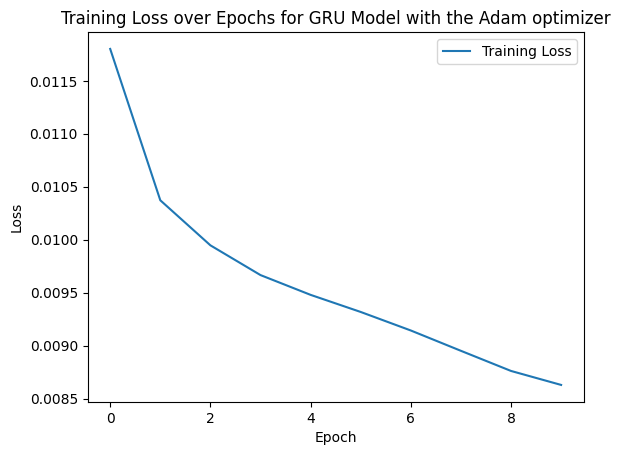

In [ ]:
# Plotting the training loss curve
plt.plot(train4_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for GRU Model with the Adam optimizer')
plt.legend()
plt.show()

# **Conclusions**
After hyperparameter tuning, we determined the model's optimal performance with specific settings: a hidden size of 100, a batch size of 128, a learning rate set to 0.001, and training conducted over 10 epochs. These configurations led to the model achieving the desired accuracy and convergence within a reasonable number of training iterations.

To assess the impact of different optimizers, we conducted experiments using two distinct optimizers. For hyperparameter tuning, we utilized the AdamW optimizer due to its quicker convergence. AdamW directly applies weight decay to the update step, modifying the weight update formula and separating weight decay from the gradient-based updates.

Additionally, we employed the Adam optimizer with identical parameters, incorporating weight decay as a regularization term added to the loss function.